#### Cancer Classification Model

`Problem Statement`

A health facility has been experiencing a lot of death due to cancer with a few survivors. They’ve recently been told on how AI can be used to predict whether a cancer case is benign or malignant on the fly without having the patient go through rigorous/expensive procedures.

`Approach`

- Examine the possibility of predicting the malignity of cancer by building ML models and verifying the accuracy of predictions.

- Get a historical dataset containing info on various cases and certain properties/characteristics that were present.

- Build ML models by trying out several algorithms and evaluating metrics 

- Since the stakeholders are interested in predicting malignant cases correctly, the recall for the malignant class would observed closely i.e we want our model to be able to identify all malignant cases in the test data.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

C:\Users\aaginam\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('cancer dataset.csv', sep=';')

#### Data Exploration

In [3]:
df.head()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses,classe
0,4,1,1,1,2,3,1,1,1,begnin
1,1,5,8,6,5,8,7,10,1,malignant
2,3,2,2,3,2,1,1,1,1,begnin
3,3,1,1,3,8,1,5,8,1,begnin
4,10,4,6,1,2,10,5,3,1,malignant


In [4]:
df.shape

(300, 10)

There are 9 possible features 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clump       300 non-null    int64 
 1   ucellsize   300 non-null    int64 
 2   ucellshape  300 non-null    int64 
 3   mgadhesion  300 non-null    int64 
 4   sepics      300 non-null    int64 
 5   bnuclei     300 non-null    int64 
 6   bchromatin  300 non-null    int64 
 7   normnucl    300 non-null    int64 
 8   mitoses     300 non-null    int64 
 9   classe      300 non-null    object
dtypes: int64(9), object(1)
memory usage: 23.6+ KB


In [6]:
df.describe()

,clump,ucellsize,ucellshape,mgadhesion,sepics,bnuclei,bchromatin,normnucl,mitoses
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.436667,3.053333,3.216667,2.653333,3.236667,3.470000,3.360000,2.860000,1.616667
std,2.820017,2.997851,3.008859,2.710037,2.205342,3.561561,2.404789,3.114386,1.800146
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
### Seperate the features and labels

features = ['clump', 'ucellsize', 'ucellshape', 'mgadhesion', 'sepics', 'bnuclei',
             'bchromatin', 'normnucl', 'mitoses']
ft = [i for i in df.columns][:-1]
label = 'classe'

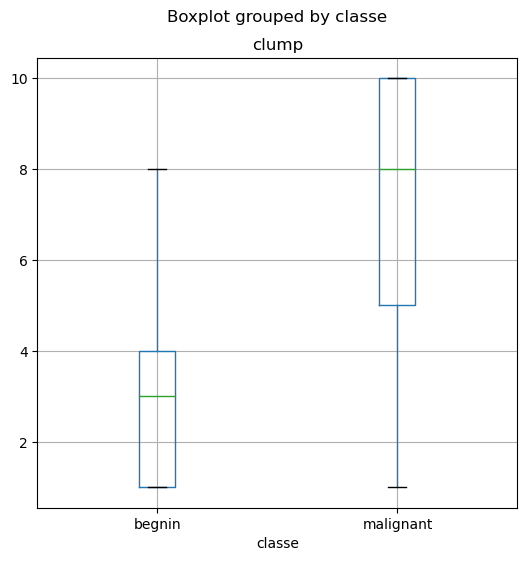

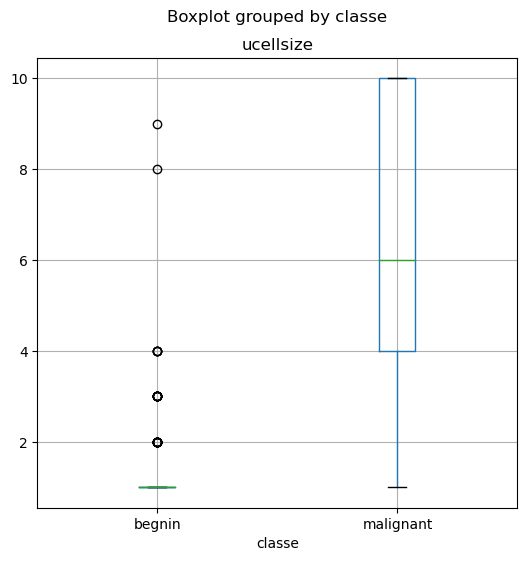

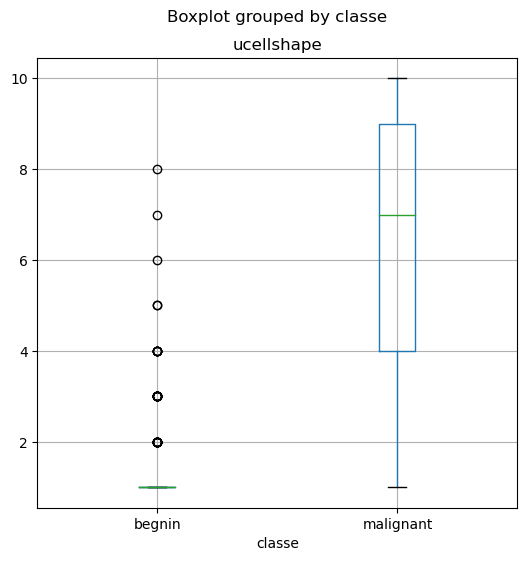

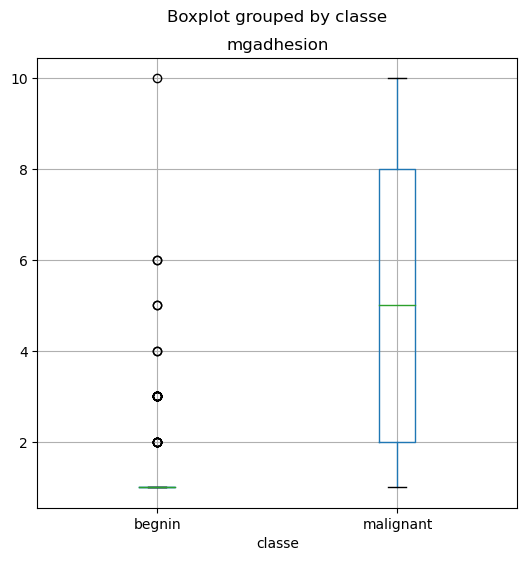

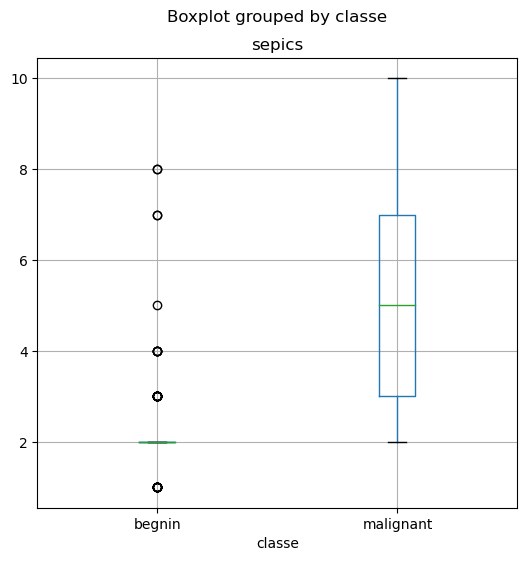

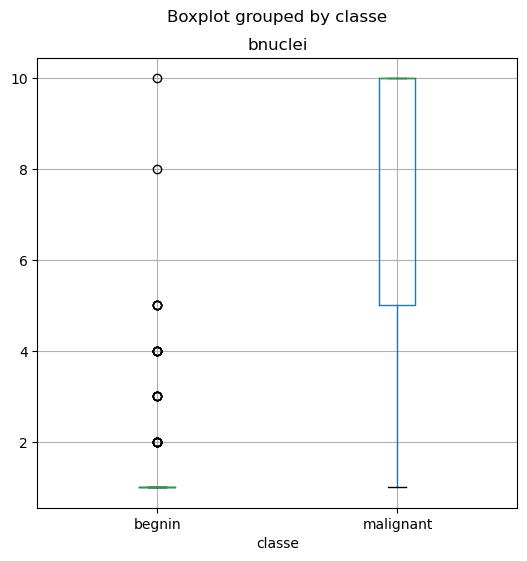

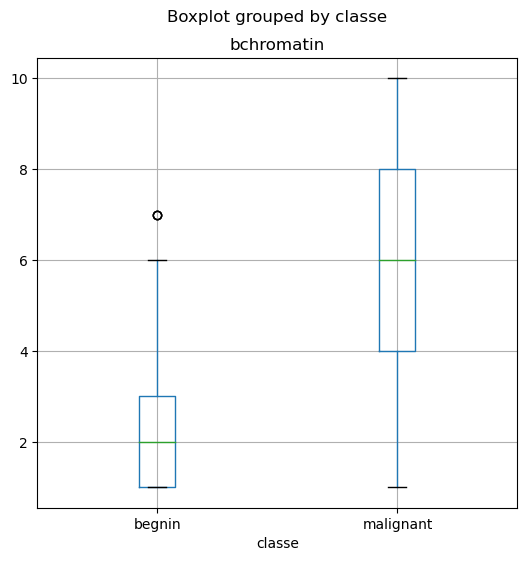

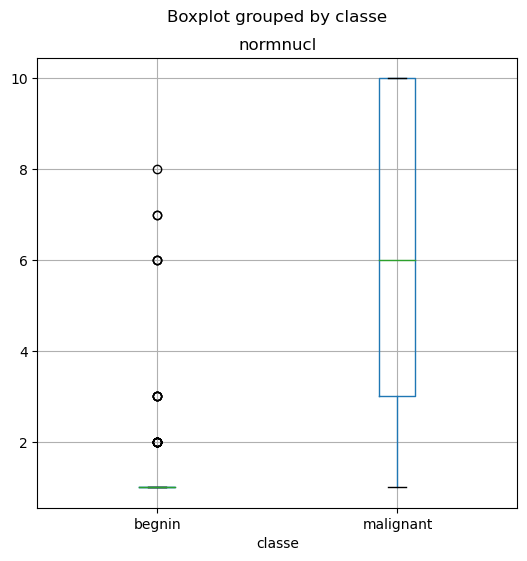

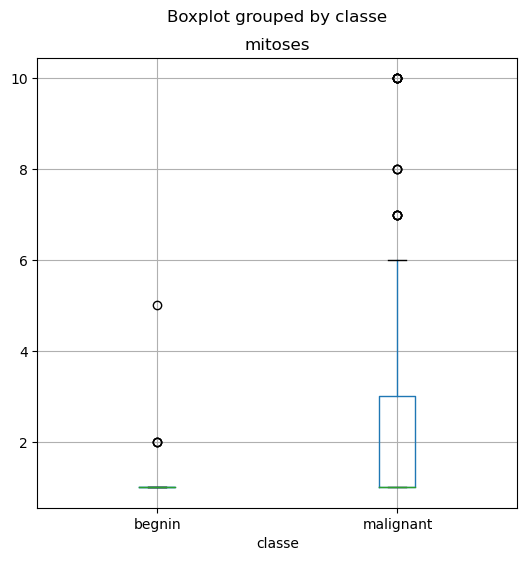

In [8]:
for col in features:
    df.boxplot(column=col, by='classe', figsize=(6,6))
    plt.title(col)
plt.show()

ucellshape, ucellsize, sepics, bnuclei show marked difference between both classes and should be good features for prediction.

In [9]:
df['classe'].value_counts()

classe
begnin       199
malignant    101
Name: count, dtype: int64

There's an imbalance in the data. We have more begnin cases than malignant

### Data Cleaning

In [10]:
df.isnull().sum()

clump         0
ucellsize     0
ucellshape    0
mgadhesion    0
sepics        0
bnuclei       0
bchromatin    0
normnucl      0
mitoses       0
classe        0
dtype: int64

In [11]:
df.duplicated().sum()

88

There's a lot of duplicates but it is possible for a data like this to have duplicates so we proceed with it

In [12]:
# Feature Engineering

df['Clump per ucellsize'] = df['clump'] / df['ucellsize'] 

In [13]:
# Let's select the best 3 features to start with

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=3)

X_selected = fs.fit_transform(df[features].values, df[label].values)

In [14]:
cols_id = fs.get_support()
selected_features = df[features].iloc[:,cols_id]

In [15]:
selected_features

,ucellsize,ucellshape,bnuclei
0,1,1,3
1,5,8,8
2,2,2,1
3,1,1,1
4,4,6,10
...,...,...,...
295,1,1,1
296,1,1,1
297,1,1,1
298,7,9,10


 When using SelectKBest for classification, our score function would be f_classif

In [16]:
X_selected.shape

(300, 3)

In [17]:
y = df[label].values

In [18]:
y.shape

(300,)

In [19]:
# encode the label
df[label] = df[label].replace({'begnin': 0, 'malignant': 1})

In [20]:
df[label].value_counts()

classe
0    199
1    101
Name: count, dtype: int64

In [21]:
y = df[label].values

##### Split the dataset and train the model

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.30, random_state=0)

Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [24]:
predictions = model.predict(X_test)

In [25]:
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9666666666666667


#### Let's check how well our model is performing

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        56
           1       1.00      0.91      0.95        34

    accuracy                           0.97        90
   macro avg       0.97      0.96      0.96        90
weighted avg       0.97      0.97      0.97        90



from the report, we can see that we have a perfect recall for the benign class and a perfect precision for the malignant class. 

In [27]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 1.0
Overall Recall: 0.9117647058823529


In [28]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[56  0]
 [ 3 31]]


<Axes: xlabel='Predicted', ylabel='Actual'>

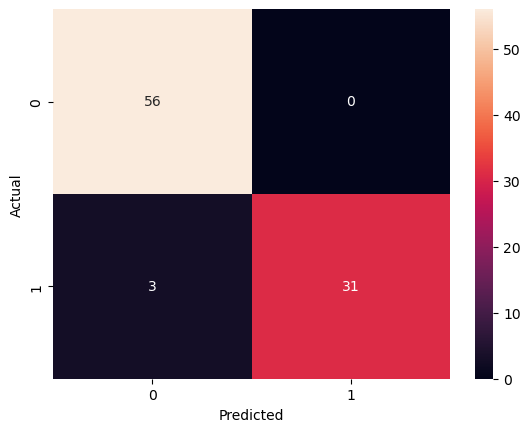

In [29]:
import seaborn as sns

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In logistic regression, predictions are based on *probability*. What actually gets predicted by a binary classifier is the probability that the label is true (**P(y)**) and the probability that the label is false (1 - **P(y)**). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (*P(y) > 0.5*) or a 0 (*P(y) <= 0.5*). You can use the **predict_proba** method to see the probability pairs for each case:

In [30]:
y_scores = model.predict_proba(X_test)

y_scores

array([[9.86561158e-01, 1.34388422e-02],
       [9.86561158e-01, 1.34388422e-02],
       [4.33750470e-01, 5.66249530e-01],
       [8.80576827e-04, 9.99119423e-01],
       [4.43753871e-02, 9.55624613e-01],
       [9.75755186e-01, 2.42448135e-02],
       [9.86561158e-01, 1.34388422e-02],
       [4.29999423e-03, 9.95700006e-01],
       [9.70975025e-01, 2.90249749e-02],
       [9.80387641e-01, 1.96123593e-02],
       [9.70975025e-01, 2.90249749e-02],
       [9.86561158e-01, 1.34388422e-02],
       [5.85625600e-02, 9.41437440e-01],
       [9.80051128e-01, 1.99488724e-02],
       [9.86561158e-01, 1.34388422e-02],
       [2.78193193e-04, 9.99721807e-01],
       [9.86561158e-01, 1.34388422e-02],
       [9.86561158e-01, 1.34388422e-02],
       [7.56758969e-01, 2.43241031e-01],
       [5.85625600e-02, 9.41437440e-01],
       [9.86561158e-01, 1.34388422e-02],
       [9.70975025e-01, 2.90249749e-02],
       [2.78193193e-04, 9.99721807e-01],
       [9.86561158e-01, 1.34388422e-02],
       [9.865611

The confusion matrix shows that our model predicted 3 examples to be begnin which was supposed to be malignant. The prediction was correct for every other instance. Would this be because we have more of the begnin class in the data.

The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the *true positive rate* (which is another name for recall) and the *false positive rate* for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a *received operator characteristic (ROC) chart*, like this:

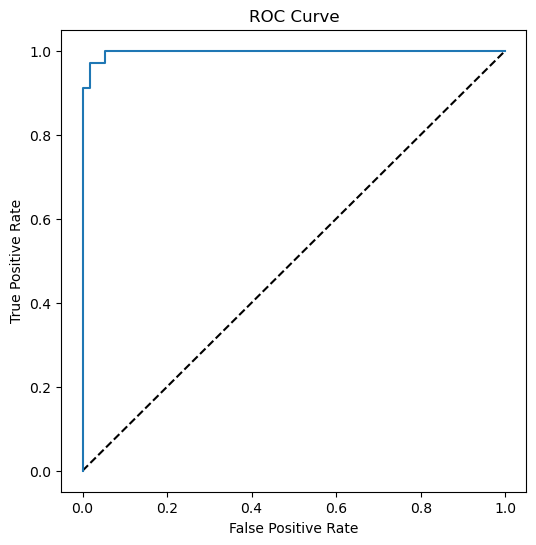

In [31]:
# Let's use an ROC curve to further visualize how well our model is performing

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)[:,1]
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores)
print('AUC: ' + str(auc))

AUC: 0.9973739495798319


An AUC value close to 1 indicates that our model is doing quite well

### Random forest classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=10)

RF_model.fit(X_train, y_train)

print(RF_model)

RandomForestClassifier(n_estimators=10)


Confusion Matrix:
 [[55  1]
 [ 6 28]] 

Accuracy: 0.9222222222222223
Overall Precision: 0.9655172413793104
Overall Recall: 0.8235294117647058

AUC: 0.9873949579831933


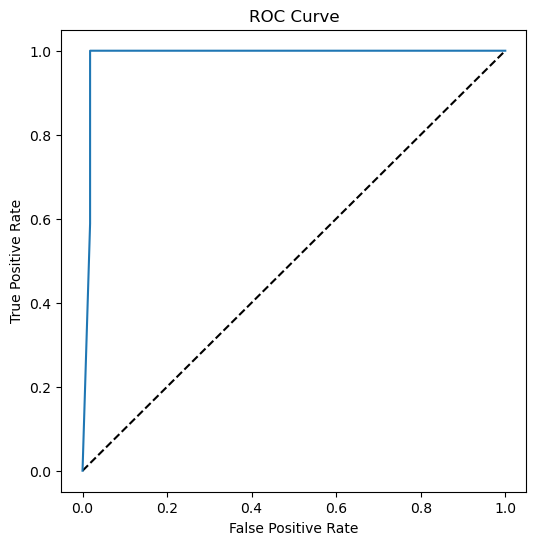

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

predictions = RF_model.predict(X_test)
y_scores = RF_model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, y_train)

KNeighborsClassifier()

Confusion Matrix:
 [[55  1]
 [ 1 33]] 

Accuracy: 0.9777777777777777
Overall Precision: 0.9705882352941176
Overall Recall: 0.9705882352941176

AUC: 0.9992121848739496


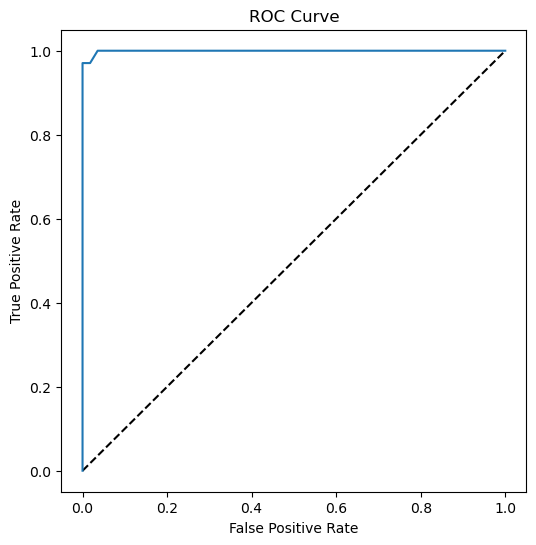

In [36]:
predictions = neigh.predict(X_test)
y_scores = neigh.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Decision Tree

In [37]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.36764705882352944, 0.9444444444444444, 'x[0] <= 2.5\ngini = 0.435\nsamples = 210\nvalue = [143, 67]'),
 Text(0.17647058823529413, 0.8333333333333334, 'x[2] <= 6.0\ngini = 0.071\nsamples = 135\nvalue = [130, 5]'),
 Text(0.11764705882352941, 0.7222222222222222, 'x[2] <= 4.5\ngini = 0.015\nsamples = 131\nvalue = [130, 1]'),
 Text(0.058823529411764705, 0.6111111111111112, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]'),
 Text(0.17647058823529413, 0.6111111111111112, 'x[1] <= 2.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.11764705882352941, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.23529411764705882, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23529411764705882, 0.7222222222222222, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5588235294117647, 0.8333333333333334, 'x[2] <= 2.5\ngini = 0.287\nsamples = 75\nvalue = [13, 62]'),
 Text(0.35294117647058826, 0.7222222222222222, 'x[0] <= 3.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.2

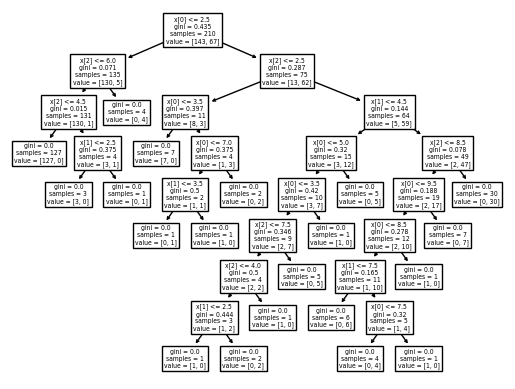

In [38]:
tree.plot_tree(clf)

Confusion Matrix:
 [[55  1]
 [ 7 27]] 

Accuracy: 0.9111111111111111
Overall Precision: 0.9642857142857143
Overall Recall: 0.7941176470588235

AUC: 0.8881302521008402


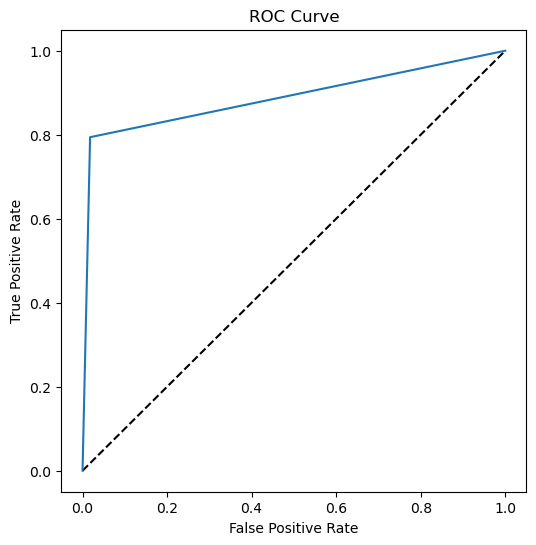

In [39]:
predictions = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

Confusion Matrix:
 [[54  2]
 [ 1 33]] 

Accuracy: 0.9666666666666667
Overall Precision: 0.9428571428571428
Overall Recall: 0.9705882352941176

AUC: 0.9989495798319328


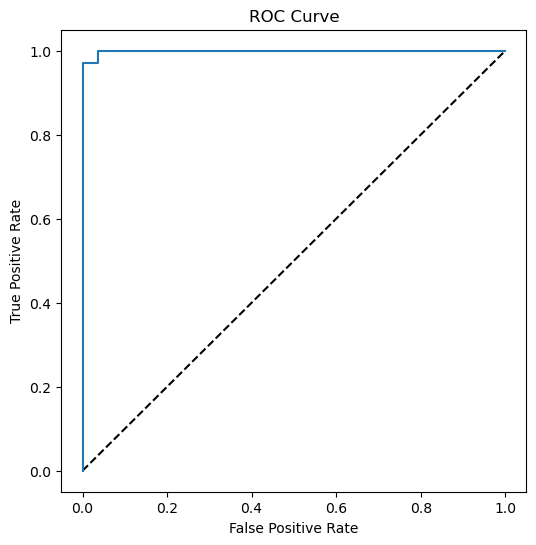

In [41]:
predictions = gnb.predict(X_test)
y_scores = gnb.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## SVC

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# clf_ = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True))

clf_ = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True)
clf_.fit(X_train, y_train)

SVC(C=1000000000.0, gamma=1e-07, probability=True)

Confusion Matrix:
 [[56  0]
 [ 5 29]] 

Accuracy: 0.9444444444444444
Overall Precision: 1.0
Overall Recall: 0.8529411764705882

AUC: 0.9984243697478992


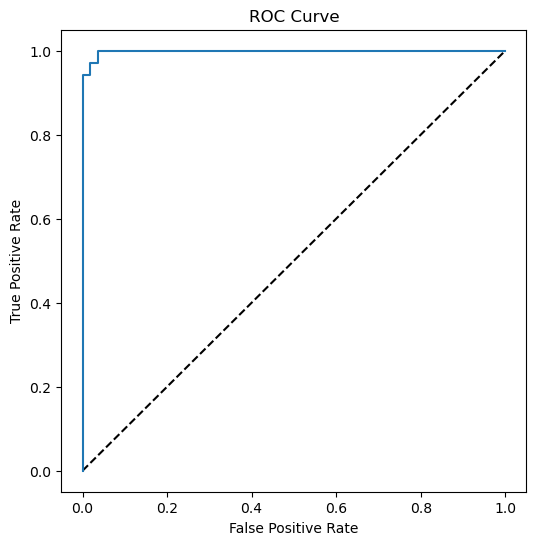

In [43]:
predictions = clf_.predict(X_test)
y_scores = clf_.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

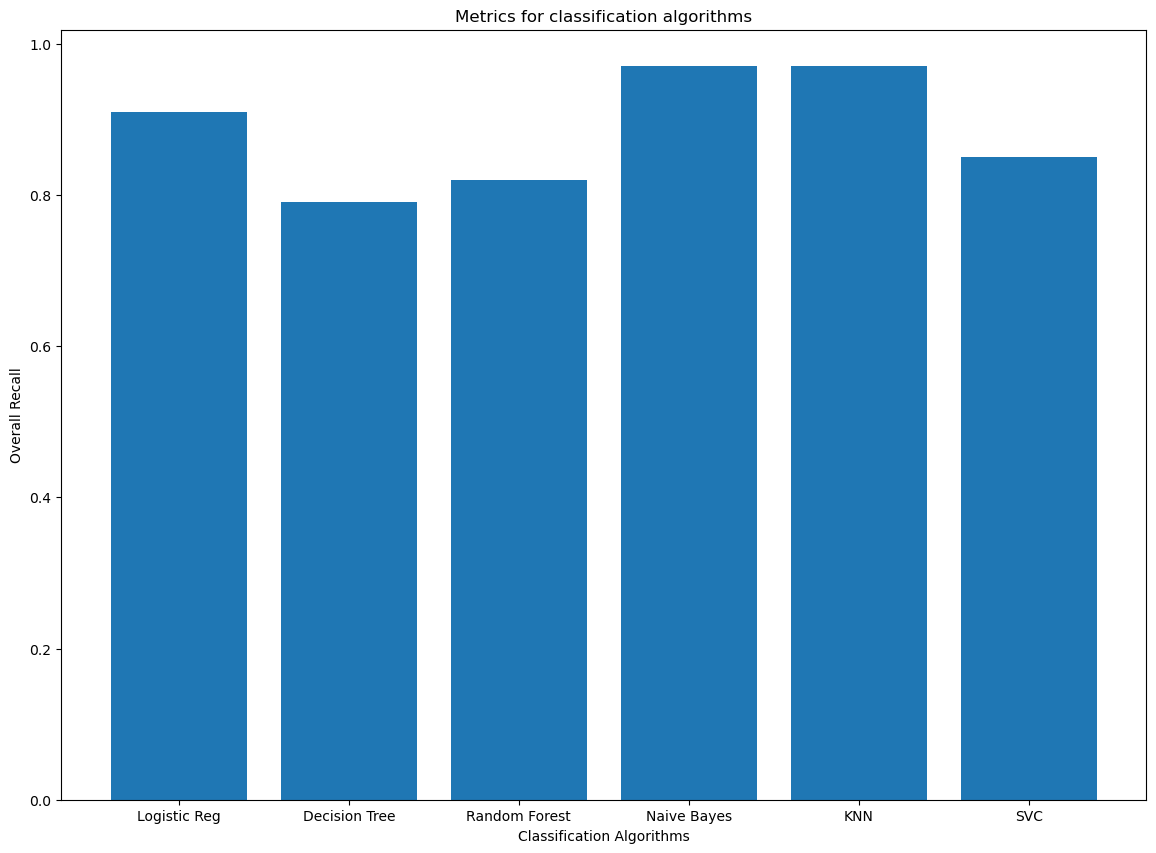

In [46]:
# rank the metrics of each algorithm based on the recall for the malignant class

Algo = ['Logistic Reg', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN', 'SVC']

recall = [0.91, 0.79, 0.82, 0.97, 0.97, 0.85]

plt.figure(figsize=(14,10))
plt.bar(Algo,recall)
plt.xlabel('Classification Algorithms')
plt.ylabel('Overall Recall')
plt.title('Metrics for classification algorithms')
plt.show()

Naives Bayes and KNN have the best metric for recall. I'd pick the KNN model because of interpretability and the size of the training data

#### Model Persistence

In [ ]:
import joblib

# Save the model as a pickle file
filename = 'cancer_model_revised.pkl'
joblib.dump(gnb, filename)